In [1]:
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix as sm
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_csv("filtered_rssi.csv") #Import filtered dataset into df variable
df.shape
#df #Delete first '#' sign to show entire dataset

(9984, 5)

In [2]:
locationStatus_dd = df["locationStatus"].drop_duplicates() #Retrive the locationStatus column and drop all duplicates
#print(locationStatus_dd) #Delete first '#' to see all possible classification

In [3]:
ls_outside = df[df['locationStatus'] == 'OUTSIDE'] #Retrive all the data with the output classified as 'OUTSIDE'
#print(ls_outside)

In [4]:
ls_inside = df[df['locationStatus'] == 'INSIDE'] #Retrieve all the data with the output classified as 'INSIDE'
#print(ls_inside)

In [5]:
ls_vestibule = df[df['locationStatus'] == 'IN_VESTIBULE'] #Retrieve all the data with the output classified as 'IN_VESTIBULE'
#print(ls_vestibule)

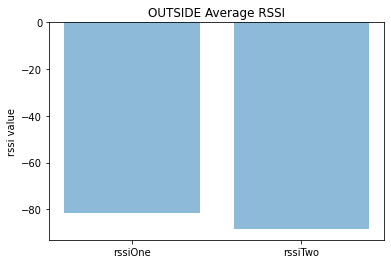

In [6]:
#Display average RSSI values for each classification

plt.bar(['rssiOne', 'rssiTwo'], (ls_outside['rssiOne'].mean(), ls_outside['rssiTwo'].mean()), align='center', alpha=0.5)
plt.xticks(label = ['rssiOne','rssiTwo'])
plt.ylabel('rssi value')
plt.title('OUTSIDE Average RSSI')
plt.show()

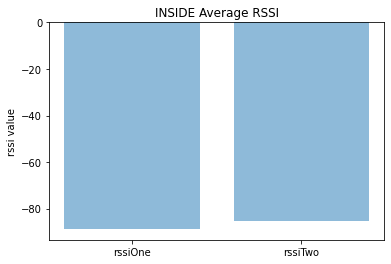

In [7]:
plt.bar(['rssiOne', 'rssiTwo'], (ls_inside['rssiOne'].mean(), ls_inside['rssiTwo'].mean()), align='center', alpha=0.5)
plt.xticks(label = ['rssiOne','rssiTwo'])
plt.ylabel('rssi value')
plt.title('INSIDE Average RSSI')
plt.show()

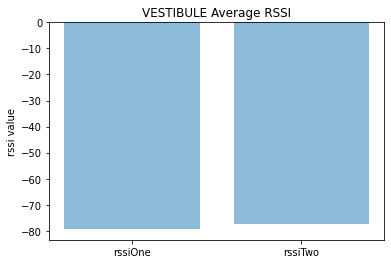

In [8]:
plt.bar(['rssiOne', 'rssiTwo'], (ls_vestibule['rssiOne'].mean(), ls_vestibule['rssiTwo'].mean()), align='center', alpha=0.5)
plt.xticks(label = ['rssiOne','rssiTwo'])
plt.ylabel('rssi value')
plt.title('VESTIBULE Average RSSI')
plt.show()

<AxesSubplot:>

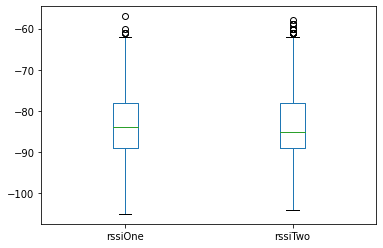

In [9]:
#Display Boxplot to generally visual the dataset.

df.boxplot(column = ['rssiOne', 'rssiTwo'], grid = False)

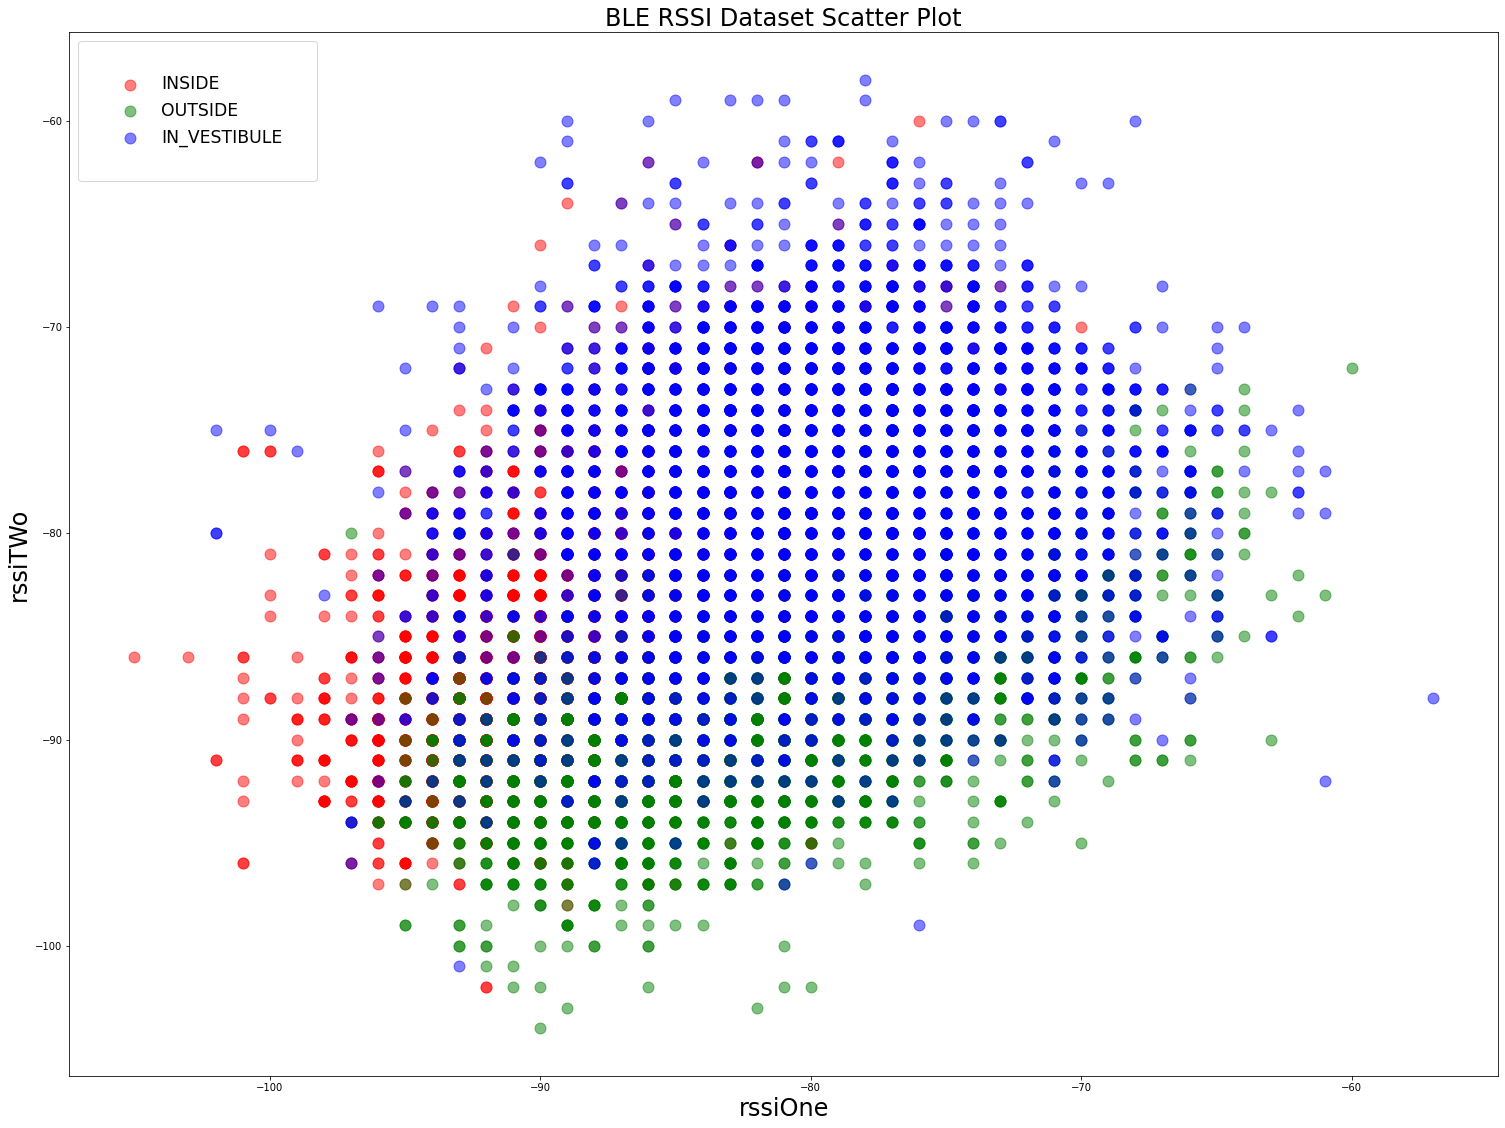

In [10]:
#Display Scatter Plot for Dataset for better data visualization

g1 = df[df['locationStatus'] == 'INSIDE']
g2 = df[df['locationStatus'] == 'OUTSIDE']
g3 = df[df['locationStatus'] == 'IN_VESTIBULE']

data = (g1, g2, g3)
colors = ("red", "green", "blue")
groups = ("INSIDE", "OUTSIDE", "IN_VESTIBULE")
plt.figure(figsize = [6.4*4, 4.8*4])
plt.scatter(g1['rssiOne'], g1['rssiTwo'], color = 'r', alpha=0.5, s = 120)
plt.scatter(g2['rssiOne'], g2['rssiTwo'], color = 'g', alpha=0.5, s = 120)
plt.scatter(g3['rssiOne'], g3['rssiTwo'], color = 'b', alpha=0.5, s = 120)
plt.xlabel('rssiOne',fontsize=24)
plt.ylabel('rssiTWo',fontsize=24)
plt.title('BLE RSSI Dataset Scatter Plot',fontsize=24)
plt.legend(groups, loc=2, fontsize = 'xx-large',borderpad=2)
plt.show()

In [11]:
#Remove outliers

rssiOne_sorted = df['rssiOne'].sort_values(ignore_index = True) #Sort rssiOne values in an ascending order
rssiTwo_sorted = df['rssiTwo'].sort_values(ignore_index = True) #Sort rssiTwo values in an ascending order

rssiOne_Q1 = (rssiOne_sorted[9984/4 - 1]+rssiOne_sorted[9984/4])/2 #Quartile 1 of rssiOne 
rssiOne_Q3 = (rssiOne_sorted[3*9984/4 - 1]+rssiOne_sorted[3*9984/4])/2 #Quartile 3 of rssiOne

rssiTwo_Q1 = (rssiTwo_sorted[9984/4 - 1]+rssiTwo_sorted[9984/4])/2 #Quartile 1 of rssiTwo
rssiTwo_Q3 = (rssiTwo_sorted[3*9984/4 - 1]+rssiTwo_sorted[3*9984/4])/2 #Quartile 3 of rssiTwo

rssiOne_IQR = rssiOne_Q3 - rssiOne_Q1 #Calculate IQR for rssiOne values
rssiTwo_IQR = rssiTwo_Q3 - rssiTwo_Q1 #Calculate IQR for rssiTwo values

rssiOne_lowLimit = rssiOne_Q1-1.5*rssiOne_IQR #Determine the lower limit of the outlier range for rssiOne
rssiOne_upLimit = rssiOne_Q3+1.5*rssiOne_IQR #Determine the upper limit of the outlier range for rssiOne
rssiTwo_lowLimit = rssiTwo_Q1-1.5*rssiTwo_IQR #Determine the lower limit of the outlier range for rssiTwo 
rssiTwo_upLimit = rssiTwo_Q3+1.5*rssiTwo_IQR #Determine the upper limit of the putlier range for rssiTwo

#Cleaning outliers from orginal Dataset
df_clean = df
df_clean = df_clean[df_clean['rssiOne'] > rssiOne_lowLimit]
df_clean = df_clean[df_clean['rssiOne'] < rssiOne_upLimit]
df_clean = df_clean[df_clean['rssiTwo'] > rssiTwo_lowLimit]
df_clean = df_clean[df_clean['rssiTwo'] < rssiTwo_upLimit]
#df_clean.shape

#Split Dataset into target and features subsets
locationStatus = df['locationStatus']
features = df.drop(['locationStatus'], axis =1)

In [12]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import svm

#LabelEncode the 'name' feature inputs for upcoming model training
name = features['name']
name = name.drop_duplicates()
le = preprocessing.LabelEncoder()
features['name'] = le.fit_transform(features['name']) #Encode name feature into integer

#Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(features, locationStatus, test_size=0.15)

X_train

,name,timestamp,rssiOne,rssiTwo
886,8,1551367809581,-91,-94
3008,9,1551368564678,-70,-91
9909,5,1551368657784,-83,-69
7105,3,1551367589536,-93,-83
5906,4,1551368377364,-70,-86
8364,5,1551368060486,-89,-86
260,8,1551367600793,-94,-89
6678,1,1551368650431,-74,-84
1872,6,1551368154766,-89,-94
4409,1,1551367874205,-85,-74


In [13]:
#SelectKBest from Best Subset Selection Method

X_new_1 = SelectKBest(k=1).fit_transform(X_train, y_train)
X_new_2 = SelectKBest(k=2).fit_transform(X_train, y_train)
X_new_3 = SelectKBest(k=3).fit_transform(X_train, y_train)
X_new_4 = SelectKBest(k=4).fit_transform(X_train, y_train)
clf = svm.SVC(kernel='linear',C=1)

scores_1 = cross_val_score(clf, X_new_1, y_train, cv=5)
scores_2 = cross_val_score(clf, X_new_2, y_train, cv=5)
scores_3 = cross_val_score(clf, X_new_3, y_train, cv=5)
scores_4 = cross_val_score(clf, X_new_4, y_train, cv=5)

print(scores_1.mean(), scores_2.mean(), scores_3.mean(), scores_4.mean())
print(scores_2)
print(scores_3)
#result shows k = 3 has the lowest error rate

0.5829582863960721 0.7742143865048347 0.8129862648212427 0.34574593979675905
[0.79093051 0.7719505  0.77312905 0.77312905 0.76193282]
[0.81154299 0.81555687 0.81143194 0.81614614 0.81025339]


In [14]:
X_new_3
X_test = X_test.drop(['timestamp'],axis = 1)
X_train = X_train.drop(['timestamp'],axis=1)
# name, rssiOne, rssiTwo are the best features.

In [15]:
#------Model Training and Prediction
#Logistic Regression Model

lr_model = LogisticRegression().fit(X_train, y_train)
lr_prediction = lr_model.predict(X_test)
pd.DataFrame(lr_prediction).head()
#lr_model.score(X_test,y_test)

,0
0,IN_VESTIBULE
1,OUTSIDE
2,OUTSIDE
3,IN_VESTIBULE
4,IN_VESTIBULE


In [16]:
#Linear Discriminant Analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
lda_prediction = lda_model.predict(X_test)
pd.DataFrame(lda_prediction).head()
#lda_model.score(X_test, y_test)

,0
0,IN_VESTIBULE
1,OUTSIDE
2,OUTSIDE
3,IN_VESTIBULE
4,IN_VESTIBULE


In [17]:
#K Nearest Neighbor

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 5) #Default K value = 5
knn_model.fit(X_train, y_train)
knn_prediction = knn_model.predict(X_test)
pd.DataFrame(knn_prediction).head()
#knn_model.score(X_test, y_test)

,0
0,IN_VESTIBULE
1,OUTSIDE
2,OUTSIDE
3,IN_VESTIBULE
4,INSIDE


In [18]:
#Support Vector Machine

clf.fit(X_train, y_train)
svc_prediction = clf.predict(X_test)
pd.DataFrame(svc_prediction).head()
#clf.score(X_test, y_test)

,0
0,IN_VESTIBULE
1,OUTSIDE
2,OUTSIDE
3,IN_VESTIBULE
4,IN_VESTIBULE


In [19]:
y_test.head()

5996    IN_VESTIBULE
804          OUTSIDE
964          OUTSIDE
7074          INSIDE
2585         OUTSIDE
Name: locationStatus, dtype: object

In [20]:
print(
    lr_model.score(X_test, y_test),
    lda_model.score(X_test, y_test),
    knn_model.score(X_test, y_test),
    clf.score(X_test, y_test)
)

0.7837116154873164 0.7897196261682243 0.9459279038718291 0.8044058744993324


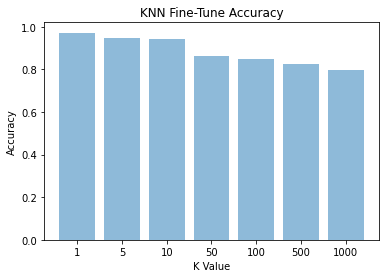

In [21]:
#KNN Model Fine-Tune, train models with K value = 1,5,10,50,100,500,1000 and plot resulting accuracy to select best KNN model

knn_model_1 = KNeighborsClassifier(n_neighbors = 1)
knn_model_10 = KNeighborsClassifier(n_neighbors = 10)
knn_model_50 = KNeighborsClassifier(n_neighbors = 50)
knn_model_100 = KNeighborsClassifier(n_neighbors = 100)
knn_model_500 = KNeighborsClassifier(n_neighbors = 500)
knn_model_1000 = KNeighborsClassifier(n_neighbors = 1000)

knn_model_1.fit(X_train, y_train)
knn_model_10.fit(X_train, y_train)
knn_model_50.fit(X_train, y_train)
knn_model_100.fit(X_train, y_train)
knn_model_500.fit(X_train, y_train)
knn_model_1000.fit(X_train, y_train)

knn_score_1 = knn_model_1.score(X_test, y_test),
knn_score_5 = knn_model.score(X_test, y_test)
knn_score_10 = knn_model_10.score(X_test, y_test),
knn_score_50 = knn_model_50.score(X_test, y_test),
knn_score_100 = knn_model_100.score(X_test, y_test),
knn_score_500 = knn_model_500.score(X_test, y_test),
knn_score_1000 = knn_model_1000.score(X_test, y_test),

knn_score_list = [knn_score_1, 
                  knn_score_5,
                   knn_score_10,
                   knn_score_50,
                   knn_score_100,
                   knn_score_500,
                   knn_score_1000]

knn_x = ['1','5','10','50','100','500','1000']

plt.bar(knn_x, knn_score_list, align='center', alpha=0.5)

plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('KNN Fine-Tune Accuracy')
plt.show()


In [ ]:
#SVC Model Fine-Tune, train models with Budget value = 1,5,50,100,250,500,1000 and plot resulting accuracy to select best SVC model

svc_model_5 = svm.SVC(kernel='linear',C=5)
svc_model_50 = svm.SVC(kernel='linear',C=50)
svc_model_100 = svm.SVC(kernel='linear',C=100)
svc_model_250 = svm.SVC(kernel='linear',C=250)
svc_model_500 = svm.SVC(kernel='linear',C=500)
svc_model_1000 = svm.SVC(kernel='linear',C=1000)

svc_model_5.fit(X_train, y_train)
svc_model_50.fit(X_train, y_train)
svc_model_100.fit(X_train, y_train)
svc_model_250.fit(X_train, y_train)
svc_model_500.fit(X_train, y_train)
svc_model_1000.fit(X_train, y_train)

svc_score_1 = clf.score(X_test, y_test)
svc_score_5 = svc_model_5.score(X_test, y_test)
svc_score_50 = svc_model_50.score(X_test, y_test),
svc_score_100 = svc_model_100.score(X_test, y_test),
svc_score_250 = svc_model_250.score(X_test, y_test),
svc_score_500 = svc_model_500.score(X_test, y_test),
svc_score_1000 = svc_model_1000.score(X_test, y_test),

svc_score_list = [svc_score_1, 
                  svc_score_5,
                   svc_score_50,
                   svc_score_100,
                   svc_score_250,
                   svc_score_500,
                   svc_score_1000]

svc_x = ['1','5','50','100','250','500','1000']

plt.bar(svc_x, svc_score_list, align='center', alpha=0.5)


plt.xlabel('Budge (C)')
plt.ylabel('Accuracy')
plt.title('SVC Fine-Tune Accuracy')
plt.show()

In [ ]:
#-----Assessing Model Performance, using Misclassification Error (MCE), Confusion Matrix, LOOCV, and K-FOLD CV

#Misclassification Error
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

lr_accuScore = accuracy_score(y_test, lr_prediction)
lda_accuScore = accuracy_score(y_test, lda_prediction)
svc_accuScore = accuracy_score(y_test, svc_prediction)

knn_prediction_1 = knn_model_1.predict(X_test)
knn_accuScore = accuracy_score(y_test, knn_prediction_1)

lr_MCE = 1- lr_accuScore
lda_MCE = 1- lda_accuScore
knn_MCE = 1- knn_accuScore
svc_MCE = 1- svc_accuScore

print(lr_MCE, lda_MCE, knn_MCE, svc_MCE)

In [ ]:
#Confusion Matrix

lr_cm = confusion_matrix(y_test, lr_prediction)
lda_cm = confusion_matrix(y_test, lda_prediction)
knn_cm_1 = confusion_matrix(y_test, knn_prediction_1)
svc_cm = confusion_matrix(y_test, svc_prediction)

plot_confusion_matrix(lr_model, X_test, y_test)
plot_confusion_matrix(lda_model, X_test, y_test)
plot_confusion_matrix(knn_model_1, X_test, y_test)
plot_confusion_matrix(clf, X_test, y_test)

In [ ]:
y_test.shape

In [ ]:
#5-Fold CV

lr_cv_5 = 1- cross_val_score(lr_model, X_test, y_test, cv=5).mean()
lda_cv_5 =1- cross_val_score(lda_model, X_test, y_test, cv=5).mean()
knn_cv_5 =1- cross_val_score(knn_model_1, X_test, y_test, cv=5).mean()
svc_cv_5 =1- cross_val_score(clf, X_test, y_test, cv=5).mean()

print(lr_cv_5, lda_cv_5, knn_cv_5, svc_cv_5)
